# ¿Cómo elegir el mejor anuncio?
Este ejercicio de práctica proviene del curso de [inteligencia artificial para empresas](https://www.udemy.com/course/ai-for-business/) de Super Data Science Team. Consiste en elegir la mejor campaña para vender un producto basándonos en las métricas que recibimos, en tiempo real, sobre la efectividad de cada anuncio. 

## Thompson Samplin Algorithm
La solución propuesta en el curso consiste en este algoritmo aleatorio. En este notebook voy a implementar esta solución a mi estilo. Resulta ser una simulación relativamente fácil, así que voy a mostrar el paso a paso de la creación de este proyecto.

## Simulando el entorno
Esta es la parte más fácil. Sabemos que un anuncio será mostrado a un posible cliente. Sólo existen dos posibilidades: el usuario decide comprar el producto, o no hace nada. Entonces, tenemos un escenario binario, que se puede simular fácilmente con una distribución de Bernoulli.

In [1]:
import numpy as np

Si sólo existen dos posibilidades, una manera de simularlo es mediante un if. En el cuadro de abajo estoy simulando el lanzamiento de una moneda.

In [2]:
if(np.random.random()<0.5):
    print('Victoria')
else:
    print('Fracaso')

Fracaso


Entonces, sabemos que cada anuncio tiene una probabilidad $x$ de convertir a un cliente. Esta probabilidad es desconocida en el mundo real, sin embargo, en esta simulación voy a utilizar probabilidades aleatorias para ocho anuncios.

In [42]:
prob_conv = [np.random.random() for i in range(8)]
for i,prob in enumerate(prob_conv):
    print(i+1,prob)

1 0.21542554783625056
2 0.9939838905462661
3 0.6562681726056431
4 0.7268460822507322
5 0.6943724329966824
6 0.4520352985852445
7 0.6339811291634289
8 0.5971233105761905


Nuestro objetivo es que el algoritmo aleatorio sea capaz de seleccionar el mejor anuncio al recibir los resultados de conversión. Por lo que, en este ejemplo, el algoritmo debería determinar que la opción 2 es la mejor.

## Implementar el algoritmo

El algoritmo maneja una probabilidad para cada una de las variables y ajusta la distribución a medida que recibe más información. Así que voy a empezar por declarar las probabilidades iniciales.

In [43]:
conversiones = np.array([1]*8)
no_conversiones = np.array([1]*8)
intenton_totales = conversiones+no_conversiones
prob_virtual_victoria = conversiones/intenton_totales

In [44]:
prob_virtual_victoria

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

Empiezo con una probabilidad inicial de 0.5 para que cada anuncio tenga su oportunidad. A medida que simulemos cada interacción con el usuario, esta probabilidad irá cambiando si el anuncio es capaz de completar la conversión.

## Simulación 

Necesitamos simular la compra de un cliente. Vamos a suponer que mostraremos nuestros anuncios a $10000$ clientes. En cada impresión vamos a elegir uno de los anuncios sin saber cuál es el mejor. Sin embargo, a medida que el algoritmo tenga más datos, la probabilidad se irá adaptando y para el final sólo mostraremos el mejor anuncio. 

In [45]:
impresiones = 10**4
for i in range(impresiones):
    #el algoritmo simula la efectividad de los anuncios
    pass


El algoritmo maneja un mundo virtual en el cual basa sus decisiones. 

In [46]:
prob_virtual_victoria

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

Por cada probabilidad virtual, vamos a tomar un número aleatorio que forme parte de su distribución. Así que, generaré un número aleatorio entre 0 y la probabilidad de cada anuncio. Al final, me quedaré sólo con el anuncio que obtenga la mejor probabilidad de vender.

In [49]:
np.random.uniform(0,0.5)

0.02916418891924749

In [50]:
max_prob = 0
max_idx = 0
for i,virtual_p in enumerate(prob_virtual_victoria):
    #consigo una muestra de la distribución
    random_sample = np.random.uniform(0,virtual_p)
    #me quedo con la opción que tiene más probabilidad de convertir
    if(random_sample>max_prob):
        max_prob=random_sample
        max_idx = i

El algoritmo seleccionó al anuncio 6 como el mejor.

In [52]:
max_idx

6

El anuncio seleccionado se muestra al cliente en el mundo real, donde se pone de manifiesto la probabilidad real de compra. Cabe recordar que ésta es desconocida, aunque aquí se haga una simulación con datos fijos.

In [53]:
if np.random.random()<prob_conv[max_idx]:
    #guardo las conversiones reales
    conversiones[max_idx]+=1
else:
    no_conversiones[max_idx]+=1

Ahora que sé qué anuncios consiguen conversiones en el mundo real, actualizo la probabilidad del mundo virtual.

In [54]:
conversiones

array([1, 1, 1, 1, 1, 1, 1, 1])

Este anuncio no logró convertir, así que su probabilidad debe disminuir.

In [55]:
no_conversiones

array([1, 1, 1, 1, 1, 1, 2, 1])

In [59]:
intenton_totales = conversiones[max_idx]+no_conversiones[max_idx]
prob_virtual_victoria[max_idx] = conversiones[max_idx]/intenton_totales

In [60]:
#probabilidad en el mundo virtual
print(prob_virtual_victoria)

[0.5        0.5        0.5        0.5        0.5        0.5
 0.33333333 0.5       ]


In [61]:
#probabilidad en el mundo real (desconocida)
print(prob_conv)

[0.21542554783625056, 0.9939838905462661, 0.6562681726056431, 0.7268460822507322, 0.6943724329966824, 0.4520352985852445, 0.6339811291634289, 0.5971233105761905]


Ahora las probabilidades ya no son iguales a lanzar una moneda. Este proceso se repite durante los $10000$ clientes y podemos concluir cuál es el anuncio más efectivo.

## Clase

In [84]:
#clase para implementar el algoritmo
class TSampling:
    """Class for Thompson Sampling"""
    def __init__(self,n:int):
        self.victorias = np.array([1]*n)
        self.fracasos = np.array([1]*n)
        #probabilidad virtual
        total = self.victorias+self.fracasos
        self.v_p  = self.victorias/total
    
    def get_virtual_p(self):
        """Get virtual probabilities """
        return self.v_p
    
    def select_best_p(self):
        """Select best option based on VP"""
        max_prob = 0
        max_idx = 0
        for i,virtual_p in enumerate(self.v_p):
            #consigo una muestra de la distribución
            random_sample = np.random.uniform(0,virtual_p)
            #me quedo con la opción que tiene más probabilidad de convertir
            if(random_sample>max_prob):
                max_prob=random_sample
                max_idx = i
        return max_idx
        
    def update_vp(self,idx:int,success:int,failure:int):
        """Update VP based on real data"""
        self.victorias[idx]+=success
        self.fracasos[idx]+=failure
        total = self.victorias[idx]+self.fracasos[idx]
        self.v_p[idx]  = self.victorias[idx]/total

In [76]:
ts = TSampling(8)

In [77]:
ts.get_virtual_p()

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [78]:
ts.select_best_p()

3

In [79]:
ts.update_vp(3,0,1)

In [80]:
ts.get_virtual_p()

array([0.5       , 0.5       , 0.5       , 0.33333333, 0.5       ,
       0.5       , 0.5       , 0.5       ])

Con la clase implementada ya puedo producir la simulación completa.

## Rendimiento
Voy a utilizar dos listas para ver cuántas ventas se consiguen si se alige el anuncio aleatoriamente o si se sigue TS.

In [81]:
ventas_ts = 0
ventas_r = 0 

In [82]:
print(prob_conv)

[0.21542554783625056, 0.9939838905462661, 0.6562681726056431, 0.7268460822507322, 0.6943724329966824, 0.4520352985852445, 0.6339811291634289, 0.5971233105761905]


El segundo anuncio debe ser el que tenga mayor probabilidad después de aplicar TS.

In [83]:
ts_ventas = TSampling(8)

In [86]:
for i in range(10**4):
    #elijo el mejor anuncio
    selected = ts_ventas.select_best_p()
    #muestro el anuncio al cliente
    if(np.random.random()<prob_conv[selected]):
        #actualizo el mundo virtual con datos reales
        ts_ventas.update_vp(selected,1,0)
        ventas_ts+=1
    else:
        #actualizo el mundo virtual con datos reales
        ts_ventas.update_vp(selected,0,1)
    
    #################
    # RANDOM SELECTION
    #################
    # elijo un anuncio al azar
    random_selected = np.random.choice([i for i in range(8)])
    
    #muestro el anuncio
    #los clientes deciden comprar o no
    if(np.random.random()<prob_conv[random_selected]):
        ventas_r+=1


Al observar las probabilidades virtuales con las reales, podemos ver que TS se acerca bastante a la realidad. Sobre todo con la mejor opción, las peores opciones eventualmente dejan de ser seleccionadas, así que no se acercan tanto al valor real.

In [90]:
ts_p = ts_ventas.get_virtual_p()

In [91]:
for i in range(8):
    print(i+1,'TS:',ts_p[i],'Real:',prob_conv[i])

1 TS: 0.16666666666666666 Real: 0.21542554783625056
2 TS: 0.995135971700199 Real: 0.9939838905462661
3 TS: 0.6564102564102564 Real: 0.6562681726056431
4 TS: 0.7436535589845694 Real: 0.7268460822507322
5 TS: 0.6890756302521008 Real: 0.6943724329966824
6 TS: 0.2 Real: 0.4520352985852445
7 TS: 0.6194331983805668 Real: 0.6339811291634289
8 TS: 0.6089108910891089 Real: 0.5971233105761905


Se puede ver que las ventas usando TS son mayores a la estrategia aleatoria, pero hagamos otro experimento con unas probabilidades de venta más realistas.

In [93]:
print('Random: {r}, TS:{ts}'.format(r=ventas_r,ts=ventas_ts))

Random: 6148, TS:8266


## Segundo ejemplo

In [123]:
real_p = [0.2, 0.19, 0.15, 0.05, 0.01, 0.1, 0.16, 0.08, 0.005, 0.17]

In [124]:
ts_ventas = TSampling(len(real_p))

In [125]:
ts_ventas.get_virtual_p()

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [126]:
ventas_ts = 0
ventas_r = 0 

In [127]:
for i in range(10**4):
    #elijo el mejor anuncio
    selected = ts_ventas.select_best_p()
    #muestro el anuncio al cliente
    if(np.random.random()<real_p[selected]):
        #actualizo el mundo virtual con datos reales
        ts_ventas.update_vp(selected,1,0)
        ventas_ts+=1
    else:
        #actualizo el mundo virtual con datos reales
        ts_ventas.update_vp(selected,0,1)
    
    #################
    # RANDOM SELECTION
    #################
    # elijo un anuncio al azar
    random_selected = np.random.choice([i for i in range(len(real_p))])
    
    #muestro el anuncio
    #los clientes deciden comprar o no
    if(np.random.random()<real_p[random_selected]):
        ventas_r+=1

Aquí pasa algo curioso, ya que termina mejorando una opción que no es la mejor, pero se acerca bastante como para que, en la práctica, no importe.

In [128]:
ts_p = ts_ventas.get_virtual_p()
for i in range(len(real_p)):
    print(i+1,'TS:',ts_p[i],'Real:',real_p[i])

1 TS: 0.1952400161355385 Real: 0.2
2 TS: 0.20093167701863354 Real: 0.19
3 TS: 0.05555555555555555 Real: 0.15
4 TS: 0.07777777777777778 Real: 0.05
5 TS: 0.047619047619047616 Real: 0.01
6 TS: 0.07142857142857142 Real: 0.1
7 TS: 0.16889312977099236 Real: 0.16
8 TS: 0.07547169811320754 Real: 0.08
9 TS: 0.05263157894736842 Real: 0.005
10 TS: 0.16778178075141534 Real: 0.17


Al agregar más opciones se hace evidente que TS logra mejores resultados que une elección al azar de los anuncios. Además, TS consigue una probabilidad para sus opciones muy cercana a la realidad, lo que permite seleccionar la mejor opción después de algunas pruebas. Así que, a partir de este punto, podríamos elegir únicamente mostrar los dos primeros anuncios para conseguir ventas y no gastar más dinero promocionando los otros.

In [130]:
print('Random: {r}, TS:{ts}'.format(r=ventas_r,ts=ventas_ts))

Random: 1105, TS:1821


## Graficando su rendimiento

Vamos a ver cómo crecen las ventas en comparación al dinero gastado, supongamos que cada impresión nos cuesta 0.2 dólares, mientras que cada venta nos produce 5 dólares de ganancia.

In [260]:
real_p = [0.2, 0.19, 0.15, 0.05, 0.3, 0.1, 0.16, 0.08, 0.005, 0.17, 0.057, 0.0256, 0.179]

In [261]:
ts_ventas = TSampling(len(real_p))

In [262]:
ventas_ts = []
ventas_r = []

In [263]:
opciones = [i for i in range(len(real_p))]

In [264]:
opciones

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [265]:
for i in range(10**3):
    #elijo el mejor anuncio
    selected = ts_ventas.select_best_p()
    #muestro el anuncio al cliente
    if(np.random.random()<real_p[selected]):
        #actualizo el mundo virtual con datos reales
        ts_ventas.update_vp(selected,1,0)
        ventas_ts.append(5)
    else:
        #actualizo el mundo virtual con datos reales
        ts_ventas.update_vp(selected,0,1)
        ventas_ts.append(-0.2)

    #################
    # RANDOM SELECTION
    #################
    # elijo un anuncio al azar
    random_selected = np.random.choice(opciones)
    
    #muestro el anuncio
    #los clientes deciden comprar o no
    if(np.random.random()<real_p[random_selected]):
        ventas_r.append(5)
    else:
        ventas_r.append(-0.2)

In [266]:
import matplotlib.pyplot as plt

La estrategia aleatoria consigue ganancias, pero podemos ver cómo en ocasiones hay pérdidas que retrasan el avance. 

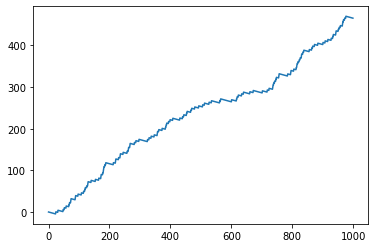

In [267]:
plt.plot(np.cumsum(ventas_r))

TS, por otro lado, consigue generar muchas más ganancias, casi el doble, y logramos eso con sólo mil impresiones. Es decir, no es necesario usar el algoritmo diez mil veces para obtener el mejor anuncio.

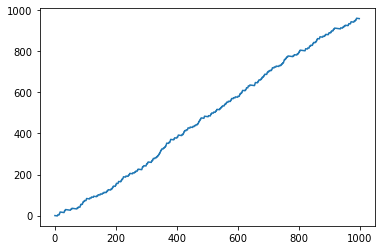

In [268]:
plt.plot(np.cumsum(ventas_ts))

In [269]:
ts_ventas.get_virtual_p()

array([0.1682243 , 0.20765027, 0.1       , 0.1       , 0.30088496,
       0.1       , 0.20689655, 0.11764706, 0.1       , 0.1       ,
       0.09090909, 0.1       , 0.16304348])

In [270]:
np.where(ts_ventas.get_virtual_p()==max(ts_ventas.get_virtual_p()))

(array([4], dtype=int64),)

La mejor opción es el quinto anuncio.